In [210]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [211]:
train_datagen = ImageDataGenerator(rescale=1./255)

In [212]:
train_generator = train_datagen.flow_from_directory('dataset/train',target_size=(150, 150),class_mode='categorical')
val_generator = train_datagen.flow_from_directory('dataset/validation',target_size=(150, 150),class_mode='categorical')

Found 1360 images belonging to 15 classes.
Found 1360 images belonging to 15 classes.


In [213]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [214]:
num_classes = train_generator.num_classes
model = Sequential([
  Conv2D(32, 3, activation='relu', input_shape=(150,150,3)),  
  MaxPool2D(),Flatten(),                                                                                             
  Dense(num_classes, activation='softmax')                            
])

In [215]:
model.compile('adam', 'categorical_crossentropy',metrics=['accuracy'])             

In [216]:
model.fit(train_generator, validation_data=val_generator, epochs=3)

Epoch 1/3
43/43 [==============================] - 28s 637ms/step - loss: 4.4617 - accuracy: 0.2779 - val_loss: 1.4207 - val_accuracy: 0.6176
Epoch 2/3
43/43 [==============================] - 25s 578ms/step - loss: 1.0884 - accuracy: 0.6912 - val_loss: 0.5470 - val_accuracy: 0.8603
Epoch 3/3
43/43 [==============================] - 25s 577ms/step - loss: 0.4104 - accuracy: 0.9000 - val_loss: 0.1862 - val_accuracy: 0.9728


In [319]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [320]:
img = load_img('zebra.jpg', target_size=(150, 150))

In [321]:
x = img_to_array(img)
x = np.expand_dims(x, axis=0)
preds = model.predict(x)

1/1 [==============================] - 0s 40ms/step


In [335]:
def generate_striped_images():
    img = np.zeros((150, 150, 3))
    for i in range(0, 150, 10):
        img[:, i:i+5, :] = 255
    return np.repeat(img[np.newaxis], 20, axis=0)

striped_images = generate_striped_images()

In [336]:
concept_activations = model.predict(striped_images)

1/1 [==============================] - 0s 124ms/step


In [328]:
X = np.concatenate([concept_activations, np.random.normal(size=concept_activations.shape)])
y = np.array([1] * len(concept_activations) + [0] * len(concept_activations))

from sklearn.linear_model import SGDClassifier
clf = SGDClassifier().fit(X, y)                                       
cav_flat = clf.coef_.ravel()

scores = (concept_activations.reshape(len(concept_activations), -1) @ cav_flat) > 0
tcav_score = scores.mean()                                          
print(f"TCAV Score: {tcav_score:.2f}")

TCAV Score: 1.00


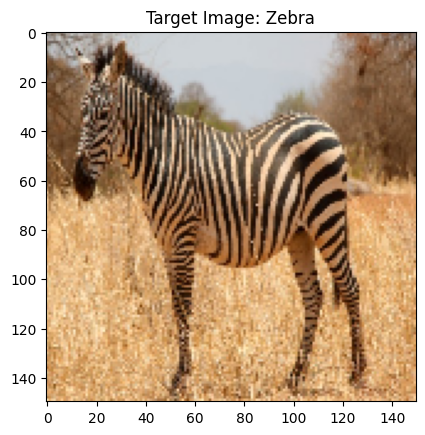

In [329]:
plt.imshow(img)
plt.title("Target Image: Zebra")
plt.show()

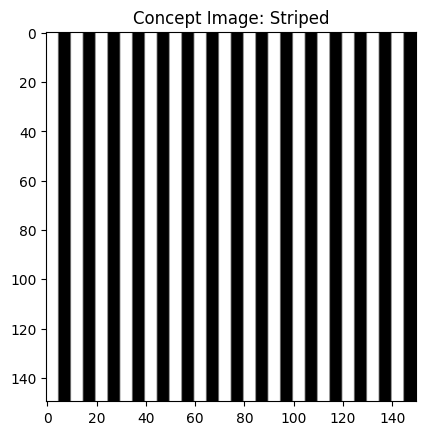

In [330]:
plt.imshow(generate_striped_images()[0].astype(np.uint8))
plt.title("Concept Image: Striped")
plt.show()